<a href="https://colab.research.google.com/github/LiviaBBLeap/motionblur/blob/main/laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports 
import cv2
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#variables
lap_threshold = 900


In [4]:
from google.colab.patches import cv2_imshow
#returns a number
def varianceOfLaplacian(imagePath="", gray=[]):
  if imagePath != "":
    gray = cv2.imread(imagePath,0)



  lap = cv2.Laplacian(gray, cv2.CV_64F).var()
  cv2_imshow(gray)
  print(np.median(gray))
  print(gray.var())
  print(lap)

  return lap

In [5]:
#splits given image into grids
def imageGridSplit(imagePath ="",gray=[], amount_width = 4, amount_height = 2):
  if imagePath!= "":
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  height, width, channels = gray.shape #if we keep colour
  #height, width = gray.shape
  increment_height= height//amount_height#270
  increment_width = width//amount_width#460
  grid_collection = []
  for h in range(amount_height):  
    for w in range(amount_width):
      im = gray[h*increment_height:h*increment_height+increment_height,w*increment_width:w*increment_width+increment_width]
      grid_collection.append(im)

  #returns a collection of cut images
  return grid_collection

In [6]:
#returns a part of the image wee actually care for, currently one third
def focusedPart(imagePath="", gray=[]):
  if imagePath!="":
    gray = cv2.imread(imagePath,0)
  #l, w = gray.shape
  l, w, c = gray.shape
  length = l//3
  return gray[length:length*2]

In [7]:
#action to take place

def actionClean(ac):
  if ac == "n":
    '''
    return 1
  else:
     return 0
     '''
  print("clean")
def actionBlurry(ac):
  '''
  if ac == "y":
    
    return 1
  else:
    return 0
  '''
  print("dirty")

In [8]:
#function that takes an image and splits, calculates
def variancesOnImage(imagePath="", gray=[],amount_height=2,amount_width=4):
  if imagePath !="":
    #gray = cv2.imread(imagePath,0)
    gray = cv2.imread(imagePath)


  f = focusedPart(gray =gray)

  c = imageGridSplit(gray=f, amount_width= amount_width, amount_height = amount_height)
  
  #keep the variance for all grids
  list_stat=[]
  
  for i in c:
    list_stat.append(varianceOfLaplacian(gray=i))

  #statistics
  m = np.median(list_stat)

  l,w,c = gray.shape
  half = w//2


  actual = imagePath[-5]
  print(m)
  if m < lap_threshold:
    return actionBlurry(actual)
    
  elif m> lap_threshold:
    return actionClean(actual)

In [ ]:
#loop for a folder
def laplacianLoop(folder_path):
  choice = []
  paths = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

  all = len(paths)
  correct =0

  for p in paths:
    i = variancesOnImage(imagePath=os.path.join(folder_path,p))
    correct +=i
  return (all, correct)




In [ ]:
#laplacianLoop("/content/drive/MyDrive/testmix")

106 99


In [ ]:
variancesOnImage("/content/drive/Shareddrives/System descriptions/LeapEye/DataImage/bbleap/date=2022-05-10/21668014/14afb5d3-7bb1-4bc6-9651-bc7fe2761c00.png",amount_width=8)

In [ ]:
variancesOnImage("/content/drive/MyDrive/mix/a0499e60-2504-47ce-a7be-6e321e8fdf1c.png",amount_width=8)

In [ ]:
variancesOnImage("/content/drive/MyDrive/rgb/00ad9c99-b81c-4c48-82e7-14ed1c3c07dc.png",amount_width=8)

In [ ]:
variancesOnImage("/content/drive/MyDrive/mix/f2c01e4a-daab-4345-ba9c-7a5108d25c3e.png",amount_width=8)

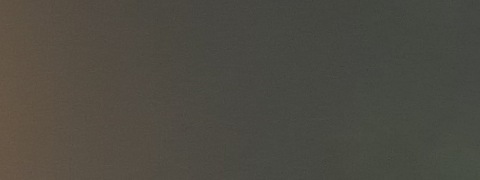

71.0
53.2076005196277
27.425338339239445


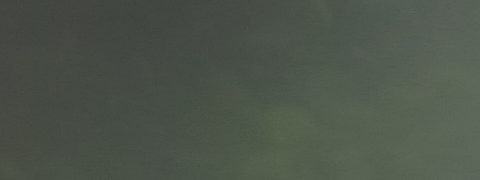

77.0
95.33405367296751
26.52260078004437


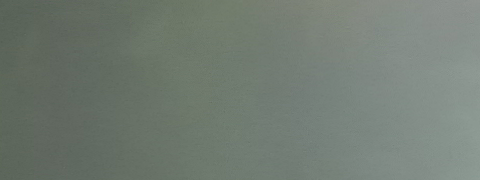

116.0
247.154025136936
24.620200512259945


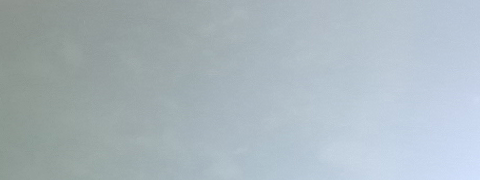

180.0
560.21341952351
27.685493376521777


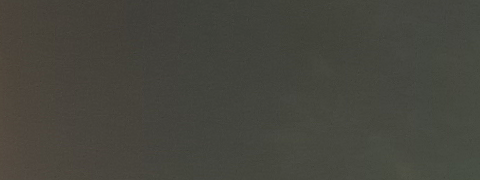

67.0
25.257919442956
26.666589433239498


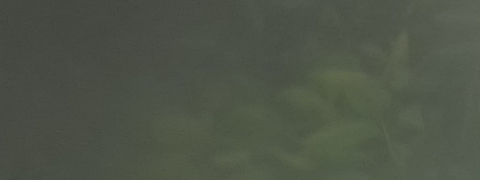

77.0
63.82226759205676
20.80601488620018


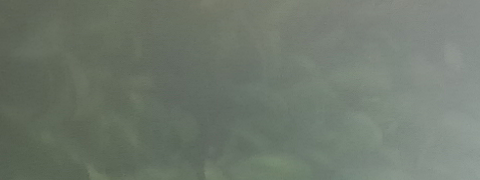

111.0
292.9548189809456
22.424656995869896


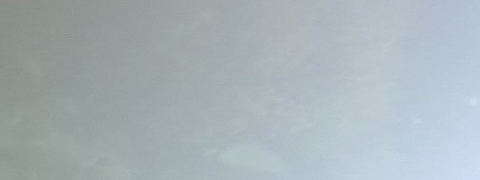

176.0
477.6817241483173
28.120631498568724


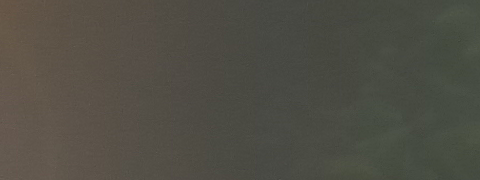

74.0
66.23788352931562
27.660864171274863


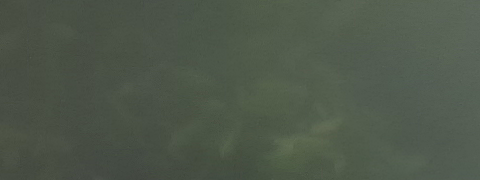

80.0
75.13978710953873
22.7668664266118


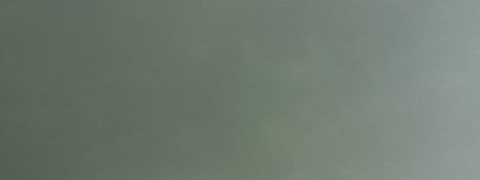

112.0
317.33261916956025
19.780111811851636


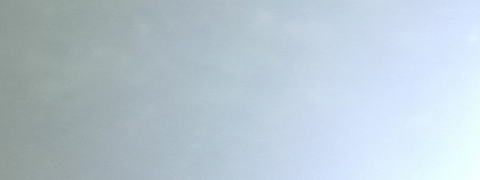

197.0
949.5940283921444
28.38895425012325


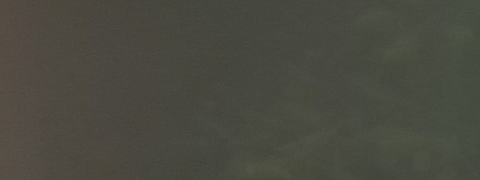

71.0
30.379893890925068
27.18955140603567


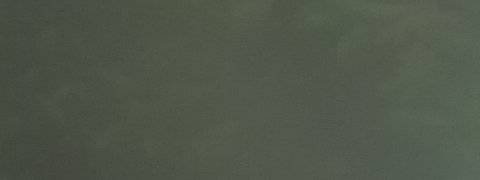

81.0
68.56118728445965
25.550056627214204


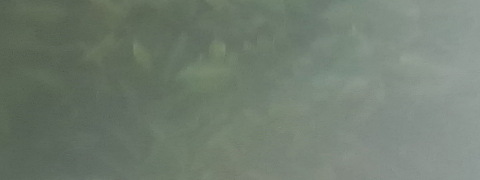

115.0
385.44965469713014
31.261960760539914


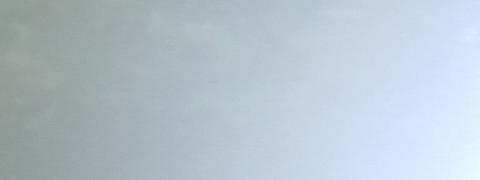

195.0
807.950167999769
28.549170522175903
26.928070419637585
dirty


In [9]:
variancesOnImage("/content/drive/Shareddrives/System descriptions/LeapEye/DataImage/bbleap/date=2022-06-02/22594022/016a28e3-c4e9-4bf6-9f98-1080ec6c591a.png",amount_width=8)